In [1]:
#install.packages("MCMCpack")
#install.packages("MVA")
#install.packages("vegan")

library(kernlab)
library(MASS)
library(MVA)
library(vegan)

Loading required package: HSAUR2
Loading required package: tools
Warning message:
“package ‘vegan’ was built under R version 3.4.3”Loading required package: permute

Attaching package: ‘permute’

The following object is masked from ‘package:kernlab’:

    how

Loading required package: lattice
This is vegan 2.4-6


In [2]:
locations <- c()

#Germanic dialect group
locations[["Aqu"]] <- "45.769725, 13.371192"
locations[["Ger1"]] <- "51.3, 6.85"
locations[["Ger2"]] <- "51.3, 6.85"
locations[["Klo"]] <- "48.304167, 16.316667"

#Central dialect group
locations[["Arne"]] <- "43.1864, 0.5061"
locations[["Aux"]] <- "47.7986, 3.5672"
locations[["Che"]] <- "48.8833, 2.6"
locations[["Dij"]] <- "47.2906, 5.0428"
locations[["Nev"]] <- "46.9933, 3.1572"
locations[["NIt"]] <- "45.466667, 9.183333"
locations[["Paris"]] <- "48.8567, 2.3508"
locations[["Rou"]] <- "49.44, 1.1"
locations[["Rou1"]] <- "49.44, 1.1"
locations[["Rou2"]] <- "49.44, 1.1"
locations[["Sens"]] <- "48.1975, 3.2877"
locations[["Ven"]] <- "45.4375, 12.335833"

#Southwestern dialect group
locations[["Ben"]] <- "41.133333, 14.783333"
locations[["Gai"]] <- "43.9014, 1.8992"
locations[["MCa"]] <- "41.4916, 13.8159"
locations[["St. Yrieix"]] <- "45.5153, 1.2042"

#Roman Chant
locations[["Rome1"]] <- "41.887556, 12.475892"
locations[["Rome2"]] <- "41.885833, 12.505556"
locations[["Rome3"]] <- "41.902222, 12.453333"

#Ambrosian Chant
locations[["Amb1"]] <- "45.4631, 9.1854"
locations[["Amb2"]] <- "45.4631, 9.1854"
locations[["Amb3"]] <- "45.4631, 9.1854"
locations[["VimA"]] <- "45.616667, 9.366667"
locations[["VimB"]] <- "45.616667, 9.366667"
locations[["VimC"]] <- "45.616667, 9.366667"
locations[["VimD"]] <- "45.616667, 9.366667"

locations <- as.data.frame(locations)
coordinates <- data.frame(do.call('rbind', strsplit(as.character(locations$locations),', ',fixed=TRUE)))

options(digits=6)
df <- cbind(locations, coordinates)
df <- df[c("X1", "X2")]
colnames(df) <- c("latitude", "longitude")
df$longitude <- as.numeric(as.character(df$longitude))
df$latitude <- as.numeric(as.character(df$latitude))
#df

In [3]:
df

,latitude,longitude
Aqu,45.7697,13.37119
Ger1,51.3000,6.85000
Ger2,51.3000,6.85000
Klo,48.3042,16.31667
Arne,43.1864,0.50610
Aux,47.7986,3.56720
Che,48.8833,2.60000
Dij,47.2906,5.04280
Nev,46.9933,3.15720
NIt,45.4667,9.18333


In [4]:
dist_folders = dir(path=".", pattern="_distance")

In [5]:
num_chants = length(dir(path="Chants")) - 1

In [10]:
for(i in 1:length(dist_folders)){
    
    #file.remove(paste(dist_folders[i],"/", dir(dist_folders[i], pattern=".pdf"), sep=""))
    
    curr_directory = dir(dist_folders[i])
    
    pdf(paste(strsplit(dist_folders[i], split=".csv"), "/","kpca_procrustes_errors.pdf", sep=""))
    print("=================================================================================")
    print(dist_folders[i] )
    
    for (j in 1:length(curr_directory)){
        print(paste(dist_folders[i],"/", curr_directory[j], sep=""))
        curr_table <- read.table(paste(dist_folders[i],"/", curr_directory[j], sep=""))
   
        #print(curr_table)
        #print("break")
        #print(row.names(curr_table))
        #print('break')
        pca <- pcv(kpca(~.,curr_table, kernel="rbfdot",kpar=list(sigma=0.2),features=2))
        #print(pca)
        data = df[row.names(curr_table),]
        
        
        procrust_var = procrustes(data, pca, scale = FALSE)
        #summary(procrust_var)

        #print(curr_directory[j])
        print(procrust_var$ss)
        plot(procrust_var, kind=1, main = paste(curr_directory[j], "_errors", sep=""))

    }
    dev.off()

    
}


[1] "================================================================================="
[1] "adist_distance"
[1] "adist_distance/adist_Benedicite Dominum.csv"
[1] 285.106
[1] "adist_distance/adist_Dominus Dixit.csv"
[1] 338.778
[1] "adist_distance/adist_Factus Est.csv"
[1] 355.215
[1] "adist_distance/adist_LexDomini.csv"
[1] 387.741
[1] "adist_distance/adist_Nomine Domini.csv"
[1] 253.252
[1] "adist_distance/adist_Rorate.csv"
[1] 347.553
[1] "adist_distance/adist_Sicut Oculi.csv"
[1] 328.256
[1] "================================================================================="
[1] "canberra_distance"
[1] "canberra_distance/canberra_Benedicite Dominum.csv"
[1] 245.761
[1] "canberra_distance/canberra_Dominus Dixit.csv"
[1] 295.545
[1] "canberra_distance/canberra_Factus Est.csv"
[1] 284.12
[1] "canberra_distance/canberra_LexDomini.csv"
[1] 234.749
[1] "canberra_distance/canberra_Nomine Domini.csv"
[1] 237.262
[1] "canberra_distance/canberra_Rorate.csv"
[1] 255.919
[1] "canberra_distance/

Warning message in .local(x, ...):
“eigenvalues of the kernel matrix are below threshold!”

[1] 10900.2
[1] "euclid_distance/euclid_Dominus Dixit.csv"
[1] 5397.44
[1] "euclid_distance/euclid_Factus Est.csv"
[1] 3474.28
[1] "euclid_distance/euclid_LexDomini.csv"
[1] 6755.06
[1] "euclid_distance/euclid_Nomine Domini.csv"
[1] 450.827
[1] "euclid_distance/euclid_Rorate.csv"
[1] 2109.37
[1] "euclid_distance/euclid_Sicut Oculi.csv"


Warning message in .local(x, ...):
“eigenvalues of the kernel matrix are below threshold!”

[1] 20804.1
[1] "================================================================================="
[1] "manhattan_distance"
[1] "manhattan_distance/manhattan_Benedicite Dominum.csv"
[1] 1246
[1] "manhattan_distance/manhattan_Dominus Dixit.csv"
[1] 843.434
[1] "manhattan_distance/manhattan_Factus Est.csv"
[1] 624.601
[1] "manhattan_distance/manhattan_LexDomini.csv"
[1] 1161.43
[1] "manhattan_distance/manhattan_Nomine Domini.csv"
[1] 264.173
[1] "manhattan_distance/manhattan_Rorate.csv"
[1] 653.766
[1] "manhattan_distance/manhattan_Sicut Oculi.csv"
[1] 1019.45
[1] "================================================================================="
[1] "mse_distance"
[1] "mse_distance/mse_Benedicite Dominum.csv"
[1] 5417.95
[1] "mse_distance/mse_Dominus Dixit.csv"
[1] 2326.45
[1] "mse_distance/mse_Factus Est.csv"
[1] 2148.86
[1] "mse_distance/mse_LexDomini.csv"
[1] 3394.28
[1] "mse_distance/mse_Nomine Domini.csv"
[1] 371.569
[1] "mse_distance/mse_Rorate.csv"
[1] 1204.59
[1] "mse_distance/

In [11]:
files <- list.files(pattern = "\\.pdf$")
files

character(0)

In [12]:
dist_folders = dist_folders[dist_folders!= "pearson_distance"]
for(i in 1:length(dist_folders)){
    
    file.remove(paste(dist_folders[i],"/", dir(dist_folders[i], pattern=".pdf"), sep=""))
    
    curr_directory = dir(dist_folders[i])
    
    pdf(paste(strsplit(dist_folders[i], split=".csv"), "/","mds_procrustes_errors.pdf", sep=""))
    
    for (j in 1:length(curr_directory)){

        curr_table <- read.table(paste(dist_folders[i],"/", curr_directory[j], sep=""))
        
        mds = cmdscale(curr_table, k=2)
    
        data = df[row.names(curr_table),]
        
        procrust_var = procrustes(data, mds, scale = FALSE)
        #summary(procrust_var)
        
        plot(procrust_var, kind=1, main = paste(curr_directory[j], "_errors", sep=""))

    }
    dev.off()

    
}

In [22]:
kpc <-kpca(~.,read.table("mse_distance/mse_LexDomini.csv"),kernel="rbfdot",kpar=list(sigma=0.2),features=2)
pca<- pcv(kpc)

In [23]:
curr_table <- read.table("mse_distance/mse_LexDomini.csv")

In [24]:
mds = cmdscale(curr_table, k=2)

data = df[row.names(curr_table),]

procrust_var = procrustes(data, pca, scale = FALSE)
summary(procrust_var)

#plot(mds[,1], y=-1 * mds[,2], type = "n")
#text(mds[,1], -1 * mds[,2], labels=colnames(rorateData[2:11]), cex=0.5, xpd=TRUE)


Call:
procrustes(X = data, Y = pca, scale = FALSE) 

Number of objects: 10    Number of dimensions: 2 

Procrustes sum of squares:  
 3394.28 
Procrustes root mean squared error: 
 18.4236 
Quantiles of Procrustes errors:
     Min       1Q   Median       3Q      Max 
 2.79178  6.01853 13.97486 15.74008 42.07965 

Rotation matrix:
          [,1]     [,2]
[1,]  0.612293 0.790631
[2,] -0.790631 0.612293

Translation of averages:
        [,1]    [,2]
[1,] 46.0159 6.07957

Scaling of target:
[1] 1


In [27]:
data = df[row.names(curr_table),]
data

,latitude,longitude
Aqu,45.7697,13.3712
Ger1,51.3000,6.8500
Dij,47.2906,5.0428
Arne,43.1864,0.5061
Nev,46.9933,3.1572
Che,48.8833,2.6000
Gai,43.9014,1.8992
MCa,41.4916,13.8159
Rou,49.4400,1.1000
Rome3,41.9022,12.4533


In [34]:
procrust_var = procrustes(data, pca, scale = TRUE)
summary(procrust_var)


Call:
procrustes(X = data, Y = pca, scale = TRUE) 

Number of objects: 10    Number of dimensions: 2 

Procrustes sum of squares:  
 306.463 
Procrustes root mean squared error: 
 5.53591 
Quantiles of Procrustes errors:
    Min      1Q  Median      3Q     Max 
1.07936 3.37550 4.48875 7.47694 8.02390 

Rotation matrix:
          [,1]     [,2]
[1,]  0.612293 0.790631
[2,] -0.790631 0.612293

Translation of averages:
        [,1]    [,2]
[1,] 46.0159 6.07957

Scaling of target:
[1] 0.105781


In [35]:
print(procrust_var$scale* pca %*% procrust_var$rotation) 
print(procrust_var$Y)
procrust_var$Yrot

            [,1]       [,2]
 [1,]  0.6785214 -0.6223636
 [2,]  1.5011911 -1.3030340
 [3,]  0.3620933 -0.4605063
 [4,]  0.1038555 -0.2626676
 [5,] -0.0919932 -0.0876913
 [6,]  1.0567671 -1.0094480
 [7,]  1.0555281 -0.9984207
 [8,] -4.1989454  3.2621423
 [9,] -1.6309757  1.1522396
[10,]  1.1639580  0.3297496
             [,1]       [,2]
site1   0.6785214 -0.6223636
site2   1.5011911 -1.3030340
site3   0.3620933 -0.4605063
site4   0.1038555 -0.2626676
site5  -0.0919932 -0.0876913
site6   1.0567671 -1.0094480
site7   1.0555281 -0.9984207
site8  -4.1989454  3.2621423
site9  -1.6309757  1.1522396
site10  1.1639580  0.3297496


site1,0.6785214,-0.6223636
site2,1.5011911,-1.3030340
site3,0.3620933,-0.4605063
site4,0.1038555,-0.2626676
site5,-0.0919932,-0.0876913
site6,1.0567671,-1.0094480
site7,1.0555281,-0.9984207
site8,-4.1989454,3.2621423
site9,-1.6309757,1.1522396
site10,1.1639580,0.3297496


       latitude longitude
Aqu   -0.246130  7.291620
Ger1   5.284145  0.770427
Dij    1.274745 -1.036773
Arne  -2.829455 -5.573473
Nev    0.977445 -2.922373
Che    2.867445 -3.479573
Gai   -2.114455 -4.180373
MCa   -4.524255  7.736327
Rou    3.424145 -4.979572
Rome3 -4.113633  6.373761
attr(,"scaled:center")
 latitude longitude 
 46.01585   6.07957 
[1] "==================================="
             [,1]       [,2]
site1   0.6785214 -0.6223636
site2   1.5011911 -1.3030340
site3   0.3620933 -0.4605063
site4   0.1038555 -0.2626676
site5  -0.0919932 -0.0876913
site6   1.0567671 -1.0094480
site7   1.0555281 -0.9984207
site8  -4.1989454  3.2621423
site9  -1.6309757  1.1522396
site10  1.1639580  0.3297496


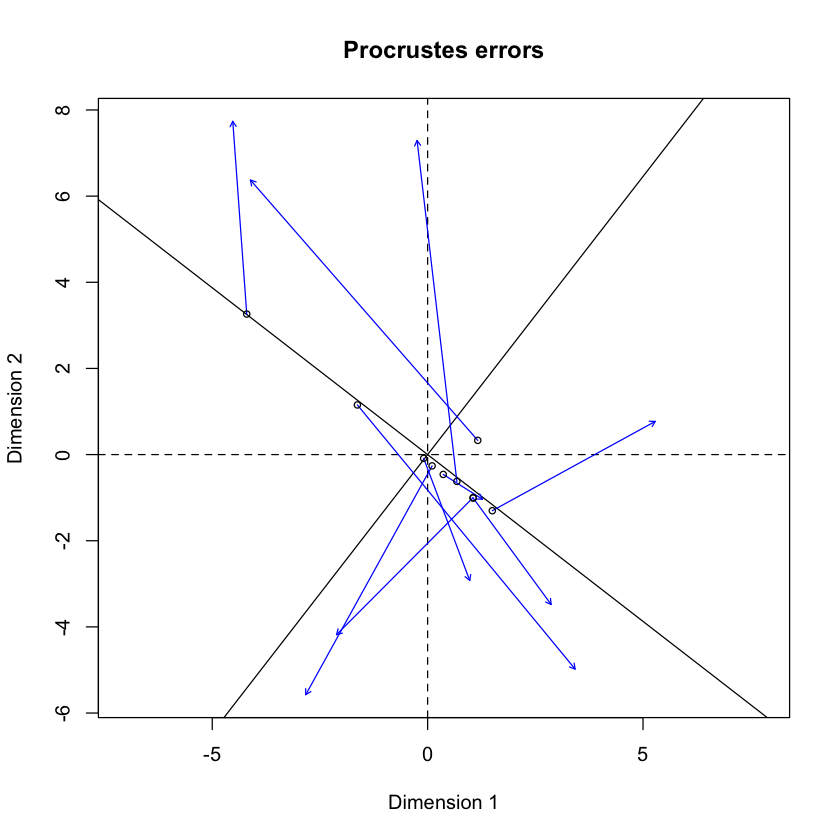

In [36]:
print(procrust_var$X)
print("===================================")

print(procrust_var$Y)
#print(procrust_var$Yrot) Y isn't rotated? Yrot == Y why?

#
plot(procrust_var)



#you can change X (actual location) with translation (add to values)
#plot shows the Y and it's error from translated X
#Turns out Y is already rotated and scaled 
    #-> Plotted Y = rotated Y -> scale * pca %*% rotation matrix

In [37]:
print(data)
procrust_var$translation
procrust_var$X
print(procrust_var$X[1,])
procrust_var$Y[1,] = procrust_var$Y[1,] + procrust_var$translation
procrust_var$Y[2,] = procrust_var$Y[2,] + procrust_var$translation
procrust_var$Y[3,] = procrust_var$Y[3,] + procrust_var$translation
procrust_var$Y[4,] = procrust_var$Y[4,] + procrust_var$translation
procrust_var$Y[5,] = procrust_var$Y[5,] + procrust_var$translation
procrust_var$Y[6,] = procrust_var$Y[6,] + procrust_var$translation
procrust_var$Y[7,] = procrust_var$Y[7,] + procrust_var$translation
procrust_var$Y[8,] = procrust_var$Y[8,] + procrust_var$translation
procrust_var$Y[9,] = procrust_var$Y[9,] + procrust_var$translation
procrust_var$Y[10,] = procrust_var$Y[10,] + procrust_var$translation
procrust_var$Y

      latitude longitude
Aqu    45.7697   13.3712
Ger1   51.3000    6.8500
Dij    47.2906    5.0428
Arne   43.1864    0.5061
Nev    46.9933    3.1572
Che    48.8833    2.6000
Gai    43.9014    1.8992
MCa    41.4916   13.8159
Rou    49.4400    1.1000
Rome3  41.9022   12.4533


46.0159,6.07957


,latitude,longitude
Aqu,-0.246130,7.291620
Ger1,5.284145,0.770427
Dij,1.274745,-1.036773
Arne,-2.829455,-5.573473
Nev,0.977445,-2.922373
Che,2.867445,-3.479573
Gai,-2.114455,-4.180373
MCa,-4.524255,7.736327
Rou,3.424145,-4.979572
Rome3,-4.113633,6.373761


 latitude longitude 
 -0.24613   7.29162 


site1,46.6944,5.45721
site2,47.5170,4.77654
site3,46.3779,5.61907
site4,46.1197,5.81690
site5,45.9239,5.99188
site6,47.0726,5.07012
site7,47.0714,5.08115
site8,41.8169,9.34171
site9,44.3849,7.23181
site10,47.1798,6.40932


In [44]:
procrust_var$Y[,1]

site1   site2   site3   site4   site5   site6   site7   site8   site9  site10 
46.6944 47.5170 46.3779 46.1197 45.9239 47.0726 47.0714 41.8169 44.3849 47.1798

In [47]:
temp = procrust_var$Y[,2]
procrust_var$Y[,2] = procrust_var$Y[,1]
procrust_var$Y[,1] = temp

In [50]:
procrust_var$Y

site1,5.45721,46.6944
site2,4.77654,47.5170
site3,5.61907,46.3779
site4,5.81690,46.1197
site5,5.99188,45.9239
site6,5.07012,47.0726
site7,5.08115,47.0714
site8,9.34171,41.8169
site9,7.23181,44.3849
site10,6.40932,47.1798


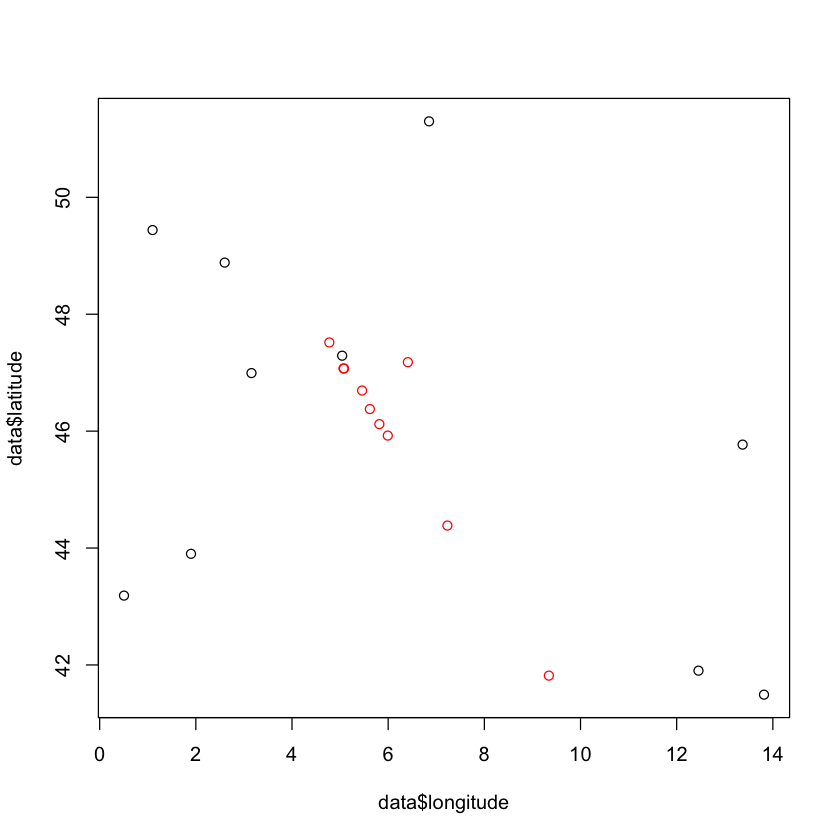

In [51]:
plot(data$longitude, data$latitude)
points(procrust_var$Y, col="red")